<a href="https://colab.research.google.com/github/Tejashwinicb2004/machinelearning/blob/main/lab01(a).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def locally_weighted_regression(X, Y, tau, x_query):
    # Compute weights as a 1D array
    weights = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))

    # Add intercept term to X
    X_augmented = np.c_[np.ones(X.shape[0]), X]
    x_query_augmented = np.array([1, x_query[0]])

    # Compute weighted normal equation
    W = np.diag(weights)  # Create a diagonal matrix for weights
    X_transpose_W = X_augmented.T @ W
    theta = np.linalg.pinv(X_transpose_W @ X_augmented) @ X_transpose_W @ Y
    return x_query_augmented @ theta

In [ ]:
import pandas as pd

db = pd.read_csv('housing.csv')
db.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [7]:
# Import the necessary library
import pandas as pd

# Load the dataset
db = pd.read_csv('housing.csv')

# Display the first few rows
print(db.head())

# Extract features and target variable
x = db[['housing_median_age']].values
y = db['median_house_value'].values


   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  


In [9]:
import pandas as pd
import numpy as np

# Load the dataset
db = pd.read_csv('housing.csv')

# Extract features and target variable
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

# Define your locally weighted regression function (assuming you have it)
def locally_weighted_regression(X, Y, tau, x_query):
    m = X.shape[0]
    X_aug = np.hstack((np.ones((m, 1)), X))
    x_query_aug = np.array([1, x_query[0]])

    W = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    W = np.diag(W)

    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ Y)
    return x_query_aug @ theta

# Predict for a house with median age 41
X_Query = np.array([41])  # Input query
tau = 0.1  # Bandwidth parameter

y_query = locally_weighted_regression(X, Y, tau, X_Query)
print(f"Predicted median house value for a house with 30 years old: {y_query}")


Predicted median house value for a house with 30 years old: 197253.77364864876


Predicted median house value for housing median age 10: 193923.82789030776
Predicted median house value for housing median age 20: 198521.40640040388
Predicted median house value for housing median age 30: 205106.16873237374
Predicted median house value for housing median age 40: 214431.02664171858
Predicted median house value for housing median age 50: 242024.36162520995


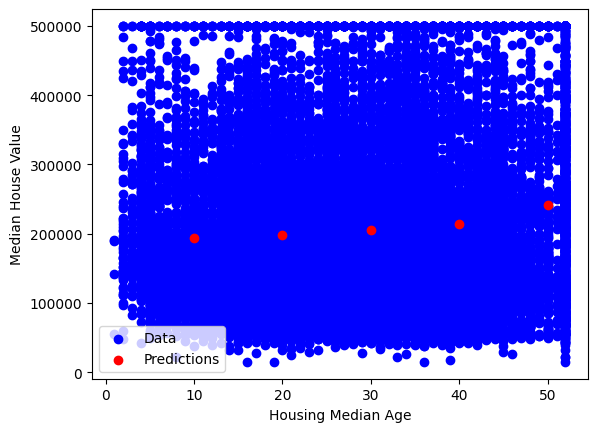

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
db = pd.read_csv('housing.csv')

# Extract features and target
X = db[['housing_median_age']].values
Y = db['median_house_value'].values

# Define the locally weighted regression function
def locally_weighted_regression(X, Y, tau, x_query):
    m = X.shape[0]
    X_aug = np.hstack((np.ones((m, 1)), X))
    x_query_aug = np.array([1, x_query[0]])

    W = np.exp(-np.sum((X - x_query)**2, axis=1) / (2 * tau**2))
    W = np.diag(W)

    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ Y)
    return x_query_aug @ theta

# Predict for multiple x_query values
x_queries = np.array([10, 20, 30, 40, 50])  # Replace with your desired query points
predictions = []

for x_query in x_queries:
    x_query = np.array([x_query])  # Ensure x_query is a 1D array
    y_query = locally_weighted_regression(X, Y, tau=10, x_query=x_query)
    predictions.append(y_query)
    print(f"Predicted median house value for housing median age {x_query[0]}: {y_query}")

# Optionally, visualize the predictions
plt.scatter(X, Y, color='blue', label='Data')
plt.scatter(x_queries, predictions, color='red', label='Predictions')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value')
plt.legend()
plt.show()


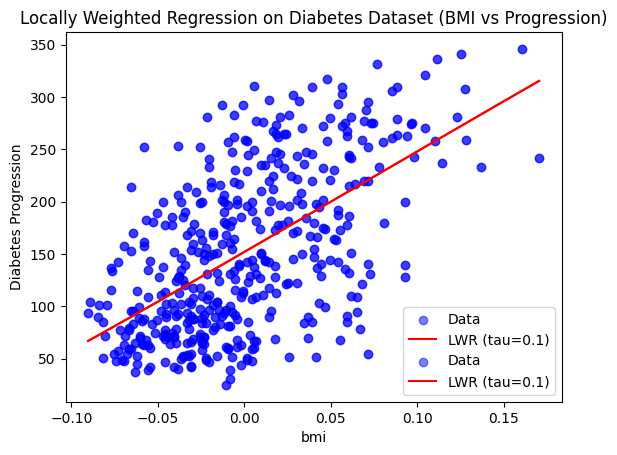

In [18]:
# prompt: Implement the same for Diabetes dataset available in sklearn.datasets give code which runs correctly wihtout any errors

from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Select a single feature for visualization (e.g., BMI)
X_feature = X[:, np.newaxis, 2]

# Define the locally weighted regression function
def locally_weighted_regression(X, Y, tau, x_query):
    m = X.shape[0]
    X_aug = np.hstack((np.ones((m, 1)), X))

    # Ensure x_query is a 2D array for compatibility with the weight calculation
    x_query_2d = np.array([[x_query[0]]]) if X.shape[1] == 1 else np.array([x_query])
    x_query_aug = np.insert(x_query, 0, 1)

    # Compute weights - use the appropriate slice of X based on the query
    weights = np.exp(-np.sum((X - x_query_2d)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)

    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ Y)
    return x_query_aug @ theta

# Predict for multiple x_query values across the range of the selected feature
x_queries = np.linspace(X_feature.min(), X_feature.max(), 100)
predictions = []
tau = 0.1  # Bandwidth parameter

for x_query in x_queries:
    # Pass the scalar value as a list or array to the function
    y_query = locally_weighted_regression(X_feature, Y, tau=tau, x_query=np.array([x_query]))
    predictions.append(y_query)

# Optionally, visualize the predictions
plt.scatter(X_feature, Y, color='blue', label='Data', alpha=0.5)
plt.plot(x_queries, predictions, color='red', label=f'LWR (tau={tau})')
plt.xlabel(diabetes.feature_names[2]) # Use the actual feature name
plt.ylabel('Diabetes Progression')
plt.title('Locally Weighted Regression on Diabetes Dataset (BMI vs Progression)')
# prompt: Implement the same for Diabetes dataset available in sklearn.datasets give code which runs correctly wihtout any errors

from sklearn.datasets import load_diabetes
import numpy as np
import matplotlib.pyplot as plt

# Load the Diabetes dataset
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target

# Select a single feature for visualization (e.g., BMI)
X_feature = X[:, np.newaxis, 2]

# Define the locally weighted regression function
def locally_weighted_regression(X, Y, tau, x_query):
    m = X.shape[0]
    X_aug = np.hstack((np.ones((m, 1)), X))

    # Ensure x_query is a 2D array for compatibility with the weight calculation
    x_query_2d = np.array([[x_query[0]]]) if X.shape[1] == 1 else np.array([x_query])
    x_query_aug = np.insert(x_query, 0, 1)

    # Compute weights - use the appropriate slice of X based on the query
    weights = np.exp(-np.sum((X - x_query_2d)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)

    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ Y)
    return x_query_aug @ theta

# Predict for multiple x_query values across the range of the selected feature
x_queries = np.linspace(X_feature.min(), X_feature.max(), 100)
predictions = []
tau = 0.1  # Bandwidth parameter

for x_query in x_queries:
    # Pass the scalar value as a list or array to the function
    y_query = locally_weighted_regression(X_feature, Y, tau=tau, x_query=np.array([x_query]))
    predictions.append(y_query)

# Optionally, visualize the predictions
plt.scatter(X_feature, Y, color='blue', label='Data', alpha=0.5)
plt.plot(x_queries, predictions, color='red', label=f'LWR (tau={tau})')
plt.xlabel(diabetes.feature_names[2]) # Use the actual feature name
plt.ylabel('Diabetes Progression')
plt.title('Locally Weighted Regression on Diabetes Dataset (BMI vs Progression)')
plt.legend()
plt.show()

In [ ]:
# prompt: Compare KNN regression and Local weighted regression (LWR) algorithm considering multiple features for both housing dataset and Diabetes dataset. give code without any error give it in short code and with no errors

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes

# Function for Locally Weighted Regression
def locally_weighted_regression(X, Y, tau, x_query):
    m = X.shape[0]
    X_aug = np.hstack((np.ones((m, 1)), X))

    # Ensure x_query is a 2D array for compatibility with the weight calculation
    x_query_2d = np.array([x_query]) if X.shape[1] > 0 else np.array([[x_query[0]]])
    x_query_aug = np.insert(x_query, 0, 1)


    # Compute weights - use the appropriate slice of X based on the query
    weights = np.exp(-np.sum((X - x_query_2d)**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)

    theta = np.linalg.pinv(X_aug.T @ W @ X_aug) @ (X_aug.T @ W @ Y)
    return x_query_aug @ theta

# --- Housing Dataset ---

# Load the dataset
!wget https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
housing_df = pd.read_csv('housing.csv')

# Select relevant features (excluding 'ocean_proximity' for simplicity with LWR here)
housing_features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
                    'total_bedrooms', 'population', 'households', 'median_income']
housing_target = 'median_house_value'

# Drop rows with missing values for selected features
housing_df_cleaned = housing_df[housing_features + [housing_target]].dropna()

X_housing = housing_df_cleaned[housing_features].values
y_housing = housing_df_cleaned[housing_target].values

# Split data for KNN
X_train_h, X_test_h, y_train_h, y_test_h = train_test_split(X_housing, y_housing, test_size=0.2, random_state=42)

# KNN Regression for Housing
knn_housing = KNeighborsRegressor(n_neighbors=5)
knn_housing.fit(X_train_h, y_train_h)
y_pred_knn_h = knn_housing.predict(X_test_h)
mse_knn_h = mean_squared_error(y_test_h, y_pred_knn_h)
print(f"Housing Dataset:")
print(f"  KNN Regression MSE: {mse_knn_h}")

# LWR for Housing (using a subset of test data and a simpler feature for demonstration)
# Due to computational cost, LWR with multiple features on a large dataset is slow.
# We'll use a smaller subset and a single feature for visualization.
X_test_subset_h = X_test_h[:100]
y_test_subset_h = y_test_h[:100]
# Let's pick 'housing_median_age' for visualization
X_test_subset_h_age = X_test_subset_h[:, housing_features.index('housing_median_age')].reshape(-1, 1)

y_pred_lwr_h = []
tau_housing = 10 # Adjust tau as needed

for x_query in X_test_subset_h_age:
    y_pred_lwr_h.append(locally_weighted_regression(X_train_h[:, housing_features.index('housing_median_age')].reshape(-1, 1), y_train_h, tau_housing, x_query))

mse_lwr_h = mean_squared_error(y_test_subset_h, y_pred_lwr_h) # Note: Comparing with subset
print(f"  LWR Regression MSE (Subset, Housing Median Age): {mse_lwr_h}")


# --- Diabetes Dataset ---

# Load the dataset
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target

# Split data for KNN
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_diabetes, y_diabetes, test_size=0.2, random_state=42)

# KNN Regression for Diabetes
knn_diabetes = KNeighborsRegressor(n_neighbors=5)
knn_diabetes.fit(X_train_d, y_train_d)
y_pred_knn_d = knn_diabetes.predict(X_test_d)
mse_knn_d = mean_squared_error(y_test_d, y_pred_knn_d)
print(f"\nDiabetes Dataset:")
print(f"  KNN Regression MSE: {mse_knn_d}")

# LWR for Diabetes (using multiple features - can be slow)
# For demonstration, we will predict for a few test samples.
X_test_subset_d = X_test_d[:10]
y_test_subset_d = y_test_d[:10]

y_pred_lwr_d = []
tau_diabetes = 0.1 # Adjust tau as needed

for x_query in X_test_subset_d:
    y_pred_lwr_d.append(locally_weighted_regression(X_train_d, y_train_d, tau_diabetes, x_query))

mse_lwr_d = mean_squared_error(y_test_subset_d, y_pred_lwr_d)
print(f"  LWR Regression MSE (Subset, Multiple Features): {mse_lwr_d}")

# Visualization (LWR on Diabetes with a single feature for clarity)
# Select BMI feature for visualization
X_bmi = X_diabetes[:, 2].reshape(-1, 1)
X_train_bmi, X_test_bmi, y_train_d_vis, y_test_d_vis = train_test_split(X_bmi, y_diabetes, test_size=0.2, random_state=42)

x_queries_bmi = np.linspace(X_train_bmi.min(), X_train_bmi.max(), 100).reshape(-1, 1)
predictions_lwr_bmi = []
tau_bmi_vis = 0.05 # Adjust tau

for x_query in x_queries_bmi:
    predictions_lwr_bmi.append(locally_weighted_regression(X_train_bmi, y_train_d_vis, tau_bmi_vis, x_query))

plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train_d_vis, color='blue', label='Train Data (BMI)', alpha=0.5)
plt.plot(x_queries_bmi, predictions_lwr_bmi, color='red', label=f'LWR (tau={tau_bmi_vis})')
plt.xlabel(diabetes.feature_names[2])
plt.ylabel('Diabetes Progression')
plt.title('LWR on Diabetes Dataset (BMI vs Progression)')
plt.legend()
plt.show()

# Visualization (KNN on Diabetes with a single feature for clarity)
knn_bmi_vis = KNeighborsRegressor(n_neighbors=5)
knn_bmi_vis.fit(X_train_bmi, y_train_d_vis)
y_pred_knn_bmi_vis = knn_bmi_vis.predict(x_queries_bmi)


plt.figure(figsize=(10, 6))
plt.scatter(X_train_bmi, y_train_d_vis, color='blue', label='Train Data (BMI)', alpha=0.5)
plt.plot(x_queries_bmi, y_pred_knn_bmi_vis, color='green', label='KNN (k=5)')
plt.xlabel(diabetes.feature_names[2])
plt.ylabel('Diabetes Progression')
plt.title('KNN on Diabetes Dataset (BMI vs Progression)')
plt.legend()
plt.show()


--2025-05-15 17:51:34--  https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1.4M) [text/plain]
Saving to: ‘housing.csv.2’

housing.csv.2       100%[===================>]   1.36M  --.-KB/s    in 0.04s   

2025-05-15 17:51:34 (34.0 MB/s) - ‘housing.csv.2’ saved [1423529/1423529]

Housing Dataset:
  KNN Regression MSE: 10091759678.607311
